# 🔍 Bölüm 4: Deprem Derinliği ve Büyüklüğü Arasındaki İlişki

Bu bölümde Marmara Bölgesi'nde meydana gelen depremlerin derinliği (km) ile büyüklüğü (Magnitude ML) arasındaki ilişki incelenmektedir. Bu analiz, sığ veya derin depremlerin daha büyük olma eğilimini görsel olarak anlamamıza yardımcı olur.

## Hedefler:
- Derinlik vs Büyüklük scatter plot
- Korelasyon katsayısı hesaplama
- (Opsiyonel) Fay tipi bazlı ayrıştırma

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marmara_faults_earthquakes_2000_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])

#Marmara
df_marmara = df[(df['Latitude'] > 39) & (df['Latitude'] < 42) &
                (df['Longitude'] > 26) & (df['Longitude'] < 31)].copy()


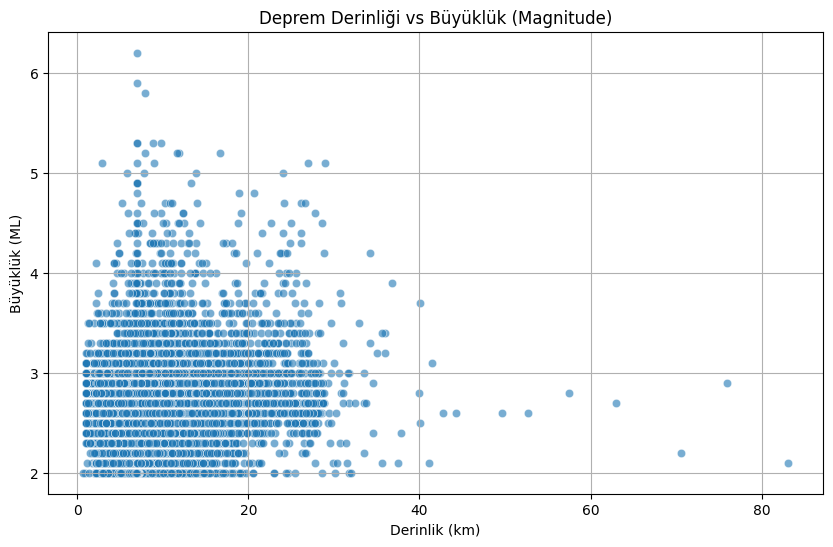

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_marmara, x='Depth_km', y='Magnitude_ML', alpha=0.6)
plt.title('Deprem Derinliği vs Büyüklük (Magnitude)')
plt.xlabel('Derinlik (km)')
plt.ylabel('Büyüklük (ML)')
plt.grid(True)
plt.show()


In [3]:
correlation = df_marmara[['Depth_km', 'Magnitude_ML']].corr()
print("Derinlik ile büyüklük arasındaki korelasyon:\n")
print(correlation)


Derinlik ile büyüklük arasındaki korelasyon:

              Depth_km  Magnitude_ML
Depth_km       1.00000       0.15921
Magnitude_ML   0.15921       1.00000


In [4]:
# İstanbul sınırları (40.8–41.3 enlem, 28.6–29.4 boylam)
df_istanbul = df_marmara[(df_marmara['Latitude'] >= 40.8) & (df_marmara['Latitude'] <= 41.3) &
                         (df_marmara['Longitude'] >= 28.6) & (df_marmara['Longitude'] <= 29.4)].copy()

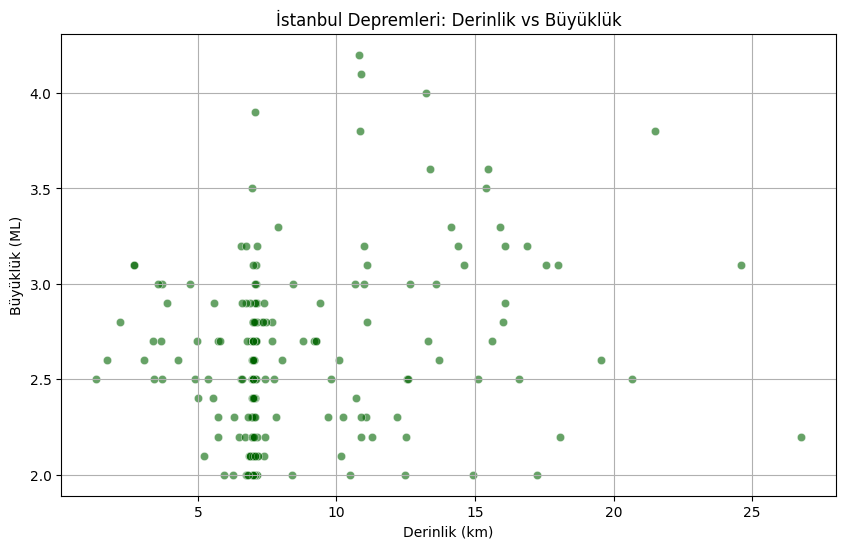

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_istanbul, x='Depth_km', y='Magnitude_ML', alpha=0.6, color='darkgreen')
plt.title('İstanbul Depremleri: Derinlik vs Büyüklük')
plt.xlabel('Derinlik (km)')
plt.ylabel('Büyüklük (ML)')
plt.grid(True)
plt.show()


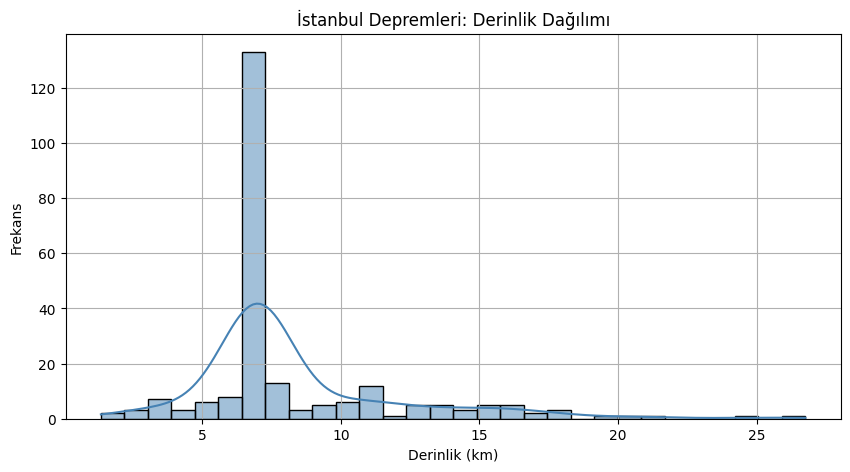

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df_istanbul['Depth_km'], bins=30, kde=True, color='steelblue')
plt.title('İstanbul Depremleri: Derinlik Dağılımı')
plt.xlabel('Derinlik (km)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


## 📌 İstanbul Depremleri: Derinlik ve Büyüklük Analizi

Bu bölümde, 2000–2025 yılları arasında İstanbul sınırları içerisinde meydana gelen depremlerin derinlik ve büyüklük dağılımları incelenmiştir.

### 🎯 Yapılan Analizler:
- **Scatter Plot** ile derinlik ve büyüklük arasındaki görsel ilişki analiz edilmiştir.
- **Histogram** ile depremlerin derinlik açısından nasıl dağıldığı gösterilmiştir.
- **Boxplot** grafiklerle büyüklük ve derinliğin medyanı, çeyrek değerleri ve uç noktaları görselleştirilmiştir.

### 📈 Gözlemler:
- Depremlerin büyük çoğunluğu **20 km'nin altındaki derinliklerde**, yani sığ odaklıdır.
- **Büyüklük değerleri**, genellikle 2.0–4.0 arasında yoğunlaşmaktadır.
- Derinlik dağılımı **asimetrik** olup, bazı uç (outlier) derin depremler dikkat çekmektedir.
- Derinlik ve büyüklük arasında belirgin bir korelasyon gözlemlenmemiştir (istatistiksel olarak da doğrulanabilir).

> Bu analiz, İstanbul özelinde depremlerin karakterini anlamak ve bölgesel risk değerlendirmelerine katkı sağlamak açısından önemlidir.
